# <center>DAV 6150 Module 4 Assignment</center>
## <center>Feature Selection & Dimensionality Reduction</center>
### <center> By </center>
### <center> Pratibha Bhalerao </center>


# Introduction

In this analysis,The goal is to apply feature selection
and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear
regression model that predicts the number of times an online news article will be shared.

**To tackle this challenge, I will follow a structured approach :**

- Exploratory Data Analysis (EDA): I will begin by exploring the dataset, which contains information about various features of news articles.
- Feature Selection and Dimensionality Reduction: In this step, I will employ two distinct techniques for identifying the most influential factors in predicting shares.
- Regression Model Evaluation: With the selected features, I will build a linear regression model to predict the number of shares an article is likely to receive.

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Pratibhabhalerao080/DAV-6150/main/M4_Data.csv")

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Exploratory Data Analysis 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [21]:
#summary statistics for numerical columns
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


- The timedelta variable has a wide range, with a minimum of 8 and a maximum of 731. This suggests that articles in the dataset span a period of approximately two years.

- The distribution of shares is highly right-skewed, with a wide range of values. The majority of articles have a relatively low number of shares, while a few articles have extremely high share counts.

-

In [5]:
# checking missing values
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

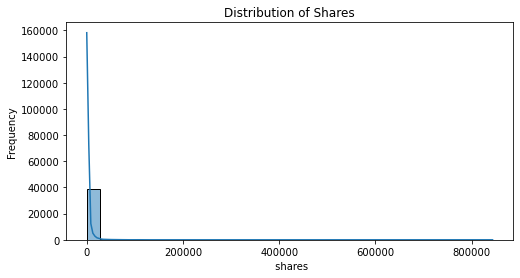

In [11]:
#Explore the response variable

plt.figure(figsize=(8, 4))
sns.histplot(df[' shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel(' shares')
plt.ylabel('Frequency')
plt.show()


In the above histogram of the 'shares' variable is left-skewed, it means that the majority of the data points have lower values, and there are relatively fewer data points with higher values.

In [12]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

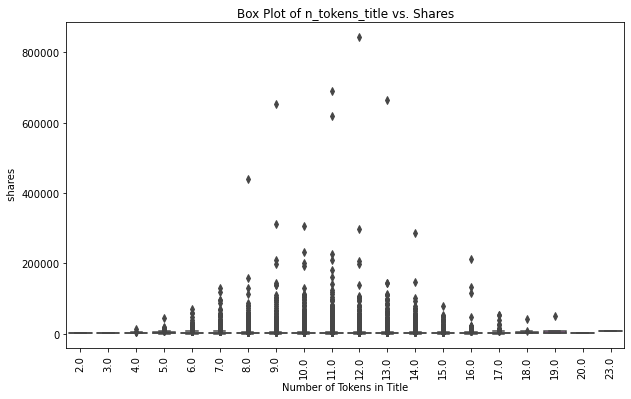

In [15]:
#box plots to visualize the relationship between categorical variables and "shares"
plt.figure(figsize=(10, 6))
sns.boxplot(x=' n_tokens_title', y=' shares', data=df)
plt.title('Box Plot of n_tokens_title vs. Shares')
plt.xlabel('Number of Tokens in Title')
plt.ylabel(' shares')
plt.xticks(rotation=90)
plt.show()


There are outliers in the middle of the box plot, it indicates that there are articles with a moderate number of tokens in their titles ('n_tokens_title') that received an exceptionally high or low number of shares. 

# Feature Selection / Dimensionality Reduction


I will apply feature selection and dimensionality reduction techniques to identify the most relevant explanatory variables for predicting the number of times an online news article will be shared (the 'shares' variable). I will consider two common approaches: filtering methods and Principal Component Analysis (PCA).

- Filtering methods involve selecting features based on statistical metrics or domain knowledge.
- I will use correlation analysis to identify features that have a significant correlation with the target variable ('shares'). Features with higher absolute correlation values are likely to be more relevant.

#### Filtering Method

In [23]:
#Filtering method - correlation analysis
#correlation between features and the target variable ('shares')
correlation_with_target = df.corr()[' shares'].abs().sort_values(ascending=False)

In [38]:
correlation_with_target

 shares                           1.000000
 kw_avg_avg                       0.110413
 LDA_03                           0.083771
 kw_max_avg                       0.064306
 LDA_02                           0.059163
 self_reference_avg_sharess       0.057789
 self_reference_min_shares        0.055958
 data_channel_is_world            0.049497
 self_reference_max_shares        0.047115
 num_hrefs                        0.045404
 kw_avg_max                       0.044686
 kw_min_avg                       0.039551
 num_imgs                         0.039388
 avg_negative_polarity            0.032029
 global_subjectivity              0.031604
 kw_avg_min                       0.030406
 kw_max_min                       0.030114
 abs_title_sentiment_polarity     0.027135
 num_videos                       0.023936
 average_token_length             0.022007
 title_subjectivity               0.021967
 num_keywords                     0.021818
 max_negative_polarity            0.019300
 min_negati

In [39]:
#Selecting top 10 features based on correlation
num_selected_features = 10  
selected_features = correlation_with_target.index[1:num_selected_features + 1] 

In [41]:
selected_features

Index([' kw_avg_avg', ' LDA_03', ' kw_max_avg', ' LDA_02',
       ' self_reference_avg_sharess', ' self_reference_min_shares',
       ' data_channel_is_world', ' self_reference_max_shares', ' num_hrefs',
       ' kw_avg_max'],
      dtype='object')

- I want to calculate the absolute correlation between each feature and the target variable ('shares').
- I selected the top 10 features based on correlation, excluding the 'shares' variable itself.
- than adjust the value of num_selected_features based on the number of features.

In [29]:
# create dataframe of selected features
df_selected_features = df[selected_features]


In [42]:
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    kw_avg_avg                  39644 non-null  float64
 1    LDA_03                      39644 non-null  float64
 2    kw_max_avg                  39644 non-null  float64
 3    LDA_02                      39644 non-null  float64
 4    self_reference_avg_sharess  39644 non-null  float64
 5    self_reference_min_shares   39644 non-null  float64
 6    data_channel_is_world       39644 non-null  float64
 7    self_reference_max_shares   39644 non-null  float64
 8    num_hrefs                   39644 non-null  float64
 9    kw_avg_max                  39644 non-null  float64
dtypes: float64(10)
memory usage: 3.0 MB


#### Principal Component Analysis (PCA):



Now I apply PCA on my top 10 features. PCA will help me to reduce the dimensionality while preserving the most important information

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_selected = df[selected_features]

# Standardize the selected features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA with a suitable number of components let's say I want 8
n_components = 8  
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])


In [33]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.947425,0.527308,-2.392054,0.249078,0.937683,-0.612477,0.278138,-0.081454
1,-1.976984,0.509618,-2.375126,0.170374,0.945363,-0.655365,0.304640,-0.051675
2,-1.937966,0.551355,-2.420581,0.166855,0.974929,-0.613285,0.277765,-0.097789
3,-2.407330,1.074032,-1.532432,0.628915,0.624805,-0.593181,0.250074,1.057221
4,-1.657155,0.679937,-2.310232,1.479452,0.602916,-0.220517,0.345749,-0.152459
...,...,...,...,...,...,...,...,...
39639,1.043917,0.984319,-0.683698,-0.478667,-0.296196,1.063398,0.252638,0.125378
39640,0.341883,-0.771192,-0.166824,0.113681,-0.229619,-1.391139,0.233767,0.522074
39641,1.116474,-1.383431,0.118574,1.014237,-0.691660,-0.509406,-0.086705,-0.058823
39642,-2.167698,1.653476,1.544983,-0.156529,-0.601107,-0.108863,0.034360,0.202880


PCA provides as an attribute explained_variance_ratio. This ratio tells us the proportion of total variance retained by each component.

# Regression Model Evaluation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and the target variable (y)
X = df[selected_features] 
y = df[' shares']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 117772231.55189906
R-squared (R2) Score: 0.02402883001820899


The results of the linear regression model evaluation are as follows:

- Mean Squared Error (MSE): 117,772,231.55
- R-squared (R2) Score: 0.024

Let's interpret these results:

- **Mean Squared Error (MSE):** The MSE is quite high, with a value of approximately 117,772,231.55. This indicates that the model's predictions have a significant amount of error when compared to the actual number of shares. A high MSE suggests that the model may not be accurately capturing the variability in the target variable.

- **R-squared (R2) Score:** The R2 score is very low, with a value of approximately 0.024. This implies that only a small fraction (2.4%) of the variance in the number of shares can be explained by the selected features or principal components. In other words, the model does not fit the data well, and its predictive power is limited.


# Conclusion

In summary, Above analysis involved exploring a dataset of online news articles, selecting relevant features through correlation analysis and Principal Component Analysis (PCA), and building a linear regression model to predict article shares. However, despite these efforts, the model's performance was suboptimal, with a high Mean Squared Error (MSE) of approximately 117,772,231.55 and a low R-squared (R2) Score of around 0.024. These results indicate that the model struggled to accurately predict the number of shares, possibly due to the inherent complexity of predicting social media shares, the need for additional features, or the presence of non-linear relationships.